## Curve Fitting

### scipy.optimize.curve_fit

In [32]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

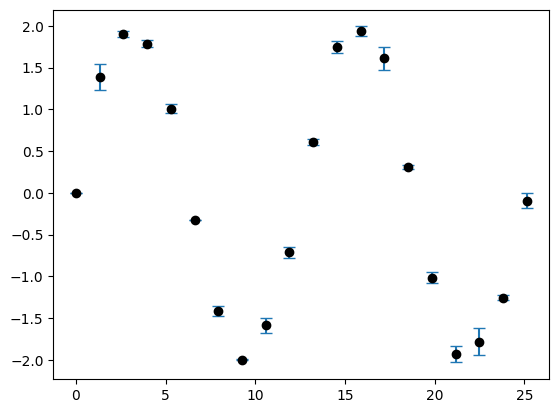

In [33]:
x_measure = np.linspace(0, 2*np.pi*4, 20)
y_real = 2*np.sin(0.5*x_measure)
y_error = 0.1*np.random.randn(len(x_measure)) # Take random samples from the standard normal distribution
y_measure = y_real + y_error
# ===============================
plt.figure()
plt.scatter(x_measure, y_measure, color='black')
plt.errorbar(x_measure, y_measure, np.abs(y_error), ls='', capsize=4, zorder=0)
plt.show()

a = 2.002820830735903, b = 0.4996539090905384

[[7.27205248e-04 1.27318849e-06]
 [1.27318849e-06 7.37276636e-07]]

Error of each parameter [0.02696674 0.00085865]


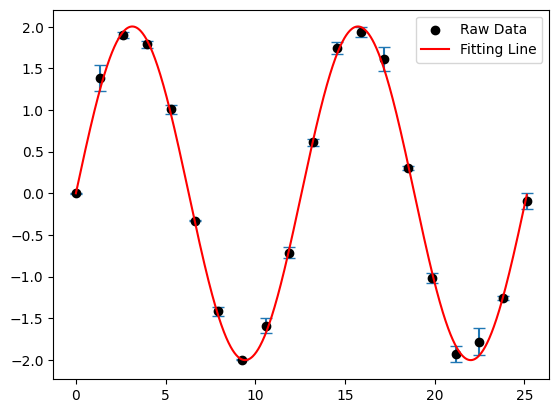

In [43]:
def fit_function(x, a, b):
    return(a*np.sin(b*x))

x0   = x_measure
y0   = y_measure
fitt = (2, 0.5)
popt, pcov = curve_fit(fit_function, x0, y0, p0=fitt)
perr = np.sqrt(np.diag(pcov))
# ----
print('a = {}, b = {}'.format(*popt))
print()
print(pcov)
print()
print('Error of each parameter',  perr)
# ===============================
fit_x = np.linspace(min(x0), max(x0), 1000)
fit_y = fit_function(fit_x, *popt)
plt.figure()
plt.scatter(x_measure, y_measure, color='black', label='Raw Data')
plt.errorbar(x_measure, y_measure, np.abs(y_error), ls='', capsize=4, zorder=0)
plt.plot(fit_x, fit_y, label='Fitting Line', color='red')
plt.legend(loc='best')
plt.show()
